# Derivatives

---

```{admonition} Revised
14 Jun 2023
```
```{contents}
```

---

## Programming Environment

In [3]:
import numpy             as np
import pandas            as pd
import matplotlib        as mpl
import matplotlib.pyplot as plt
from   matplotlib           import gridspec
from   mpl_toolkits.mplot3d import axes3d
from   ipywidgets           import interactive
plt.style.use('ggplot');

import sympy as smp
from   sympy import *

import plotly
import plotly.figure_factory as ff
import plotly.graph_objects  as go

from IPython.display import display, Math

from   datetime import datetime as d
import locale                   as l
import platform                 as p
import sys                      as s

pad = 20
print(f"{'Executed'.upper():<{pad}}: {d.now()}")
print()
print(f"{'Platform'        :<{pad}}: "
      f"{p.mac_ver()[0]} | "
      f"{p.system()} | "
      f"{p.release()} | "
      f"{p.machine()}")
print(f"{''                :<{pad}}: {l.getpreferredencoding()}")
print()
print(f"{'Python'          :<{pad}}: {s.version}")
print(f"{''                :<{pad}}: {s.version_info}")
print(f"{''                :<{pad}}: {p.python_implementation()}")
print()
print(f"{'Matplotlib'      :<{pad}}: {mpl   .__version__}")
print(f"{'NumPy'           :<{pad}}: {np    .__version__}")
print(f"{'Pandas'          :<{pad}}: {pd    .__version__}")
print(f"{'Plotly'          :<{pad}}: {plotly.__version__}")
print(f"{'SymPy'           :<{pad}}: {smp   .__version__}")

EXECUTED            : 2023-06-14 12:57:56.337837

Platform            : 13.3.1 | Darwin | 22.4.0 | arm64
                    : UTF-8

Python              : 3.10.8 | packaged by conda-forge | (main, Nov 22 2022, 08:25:29) [Clang 14.0.6 ]
                    : sys.version_info(major=3, minor=10, micro=8, releaselevel='final', serial=0)
                    : CPython

Matplotlib          : 3.6.3
NumPy               : 1.24.1
Pandas              : 1.5.3
Plotly              : 5.13.0
SymPy               : 1.11.1


---

## $\begin{aligned}\frac{d}{dx} \left( \frac{1 + \sin(x)}{1 - \cos(x)} \right)^2\end{aligned}$

$
\begin{aligned}
\frac{d}{dx} \left( \frac{1 + \sin(x)}{1 - \cos(x)} \right)^2
\end{aligned}
$

In [4]:
x = smp.symbols('x')

smp.diff(
  ((1 + smp.sin(x)) / (1 - smp.cos(x)))**2,
  x,
  1, # first derivative
)

2*(sin(x) + 1)*cos(x)/(1 - cos(x))**2 - 2*(sin(x) + 1)**2*sin(x)/(1 - cos(x))**3

---

## $\begin{aligned}\frac{d}{dx} \left( \frac{y + \sin(x)}{1 - \cos(x)} \right)^2\end{aligned}$

$
\begin{aligned}
\frac{d}{dx} \left( \frac{y + \sin(x)}{1 - \cos(x)} \right)^2
\end{aligned}
$

In [5]:
x, y = smp.symbols('x y')

smp.diff(((y + smp.sin(x)) / (1 - smp.cos(x)))**2, x, 1)

2*(y + sin(x))*cos(x)/(1 - cos(x))**2 - 2*(y + sin(x))**2*sin(x)/(1 - cos(x))**3

---

## $\begin{aligned}\frac{d}{dx} (\log_5(x))^\frac{x}{2}\end{aligned}$

$
\begin{aligned}
\frac{d}{dx} (\log_5(x))^\frac{x}{2}
\end{aligned}
$

In [6]:
x = smp.symbols('x')

smp.diff(smp.log(x, 5)**(x/2), x, 1)

(log(x)/log(5))**(x/2)*(log(log(x)/log(5))/2 + 1/(2*log(x)))

---

## $\begin{aligned}\frac{d}{dx} f(x + g(x))\end{aligned}$

$
\begin{aligned}
\frac{d}{dx} f(x + g(x))
\end{aligned}
$

In [7]:
x    = smp.symbols('x')
f, g = smp.symbols('f g', cls=smp.Function)

g = g(x)
f = f(x + g)

smp.diff(f, x, 1)

(Derivative(g(x), x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + g(x))

---

## Trigonometric Functions

### $\begin{aligned}\frac{d}{d\theta}\sin\theta=\cos\theta\end{aligned}$

$
\begin{aligned}
\frac{d}{d\theta}\sin\theta\,[\text{rad}]=\cos\theta\,[\text{rad}]
\end{aligned}
$

$
\begin{aligned}
\frac{\Delta y}{\Delta x}
&=\frac{y_2-y_1}{x_2-x_1}
=\frac{\sin(x+\Delta x)-\sin x}{x+\Delta x-x}
=\frac{\sin x\cos\Delta x+\cos x\sin\Delta x-\sin x}{\Delta x}
=\frac{\sin x\cos\Delta x-\sin x}{\Delta x}+\frac{\cos x\sin\Delta x}{\Delta x}
\\
\frac{dy}{dx}
=\lim_{\Delta x\to0}\frac{\Delta y}{\Delta x}
&=\sin x\lim_{\Delta x\to0}\frac{\cos\Delta x-1}{\Delta x}+\cos x\lim_{\Delta x\to0}\frac{\sin\Delta x}{\Delta x}
=\cos x
\end{aligned}
$

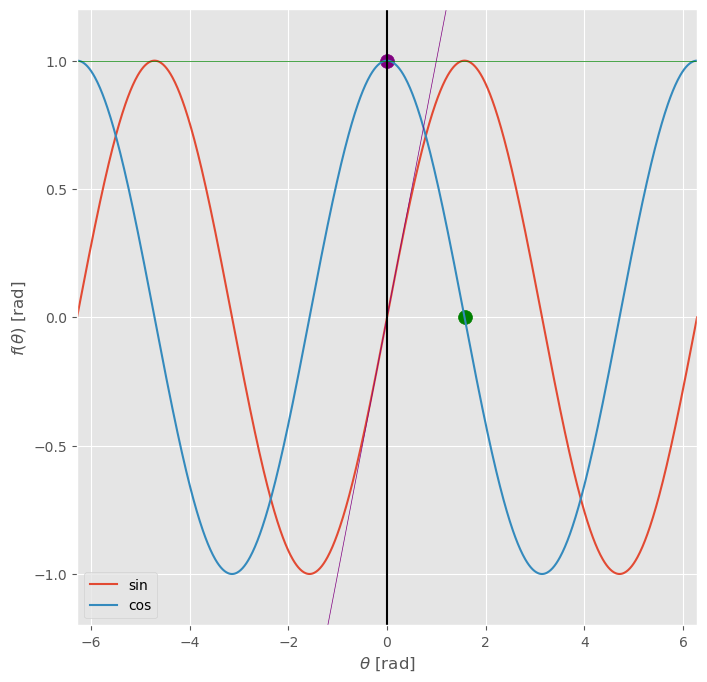

In [ ]:
t =np.linspace(-2*np.pi,2*np.pi,1001)
f =np.sin(t)
df=np.cos(t)

fig=plt.figure(figsize=(8,8));
ax =plt.subplot();
ax.plot(t, f,label='sin');
ax.plot(t,df,label='cos');
ax.scatter(0,1,color='purple',s=100);
ax.plot(t,t,color='purple',linewidth=0.5);
ax.scatter(np.pi/2,0,color='green',s=100);
ax.plot(t,np.ones(1001),color='green',linewidth=0.5);
ax.axvline(0,color='k');
ax.set_xlim(-2*np.pi,2*np.pi);
ax.set_xlabel('$\\theta$ [rad]');
ax.set_ylim(-1.2,1.2)
ax.set_ylabel('$f(\\theta)$ [rad]');
ax.legend();

---

## To Review

Finite Difference

$
f(x+b)-f(x+a)
$

Difference Quotient

$
\begin{aligned}
\frac{f(x+b)-f(x+a)}{b-a}
\end{aligned}
$

Difference Operator

$
\Delta:f\rightarrow\Delta[f]
$

Newton's Difference Quotient, or a first-order divided difference

$
\begin{aligned}
\frac{f(x+h)-f(x)}{h}
\end{aligned}
$

Definition of the Derivative of $f$ at $x$

$
\begin{aligned}
f'(x)
\overset{\text{def}}{=}
\underset{h\rightarrow0}{\lim}\frac{f(x+h)-f(x)}{h}
\end{aligned}
$

---

## Terms

* [[w](https://en.wikipedia.org/wiki/Antiderivative)] Antiderivative
* [[w](https://en.wikipedia.org/wiki/Indefinite_sum)] Antidifference (Indefinite Sum)
* [[w](https://en.wikipedia.org/wiki/Derivative)] Derivative
* [w] Difference Operator
* [[w](https://en.wikipedia.org/wiki/Difference_quotient)] Difference Quotient
* [[w](https://en.wikipedia.org/wiki/Differentiable_function)] Differentiable Function
* [[w](https://en.wikipedia.org/wiki/Discrete_calculus)] Discrete Calculus
* [[w](https://en.wikipedia.org/wiki/Divided_differences)] Divided Difference
* [[w](https://en.wikipedia.org/wiki/Finite_difference)] Finite Difference
* [[w](https://en.wikipedia.org/wiki/Functional_equation)] Functional Equation
* [[w](https://en.wikipedia.org/wiki/Indefinite_sum)]  Indefinite Sum (Antidifference)
* [[w](https://en.wikipedia.org/wiki/Infinitesimal)] Infinitesimal
* [[w](https://en.wikipedia.org/wiki/Instant)] Instant
* [[w](https://en.wikipedia.org/wiki/Rate_(mathematics))] Rate
* [[w](https://en.wikipedia.org/wiki/Recurrence_relation)] Recurrence Relation
* [[w](https://en.wikipedia.org/wiki/Semi-differentiability)] Semi Differentiability
* [[w](https://en.wikipedia.org/wiki/Symmetric_derivative)] Symmetric Derivative
* [[w](https://en.wikipedia.org/wiki/Time_scale_calculus)] Time-Scale Calculus

---

## Bibliography

* [[Y](https://www.youtube.com/watch?v=-SdIZHPuW9o)] Mr. P Solver. (26 May 2021). "1st Year Calculus, But in PYTHON". YouTube.

---